In [1]:
%pylab inline
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


# Shape tensor definition: 

\begin{equation}
S_{i,j} = \dfrac{\sum_{k} m_k (r_{k})_i (r_{k})_j} {\sum_{k} m_k w(r)_k}
\end{equation}
Where $w(r)$ is the weight function defined as:

\begin{equation}
w(r) = \dfrac{1}{r_{ell}^2}
\end{equation}

Where the elliptical radius $r_{ell}$ is defined as:

\begin{equation}
r_{ell} = \sqrt{x_{ell}^2 + \dfrac{y_{ell}^2}{(b/a)^2} + \dfrac{z_{ell}^2}{(c/a)^2}}
\end{equation}

Where the $c \leq b \leq a$

For our purporses all of the particles have the same mass then the shape tensor can be expressed as:

\begin{equation}
S_{i,j} = \dfrac{\sum_{k}  (r_{k})_i (r_{k})_j} {\sum_{k}  w(r_{ell})_k}
\end{equation}



In [2]:
def shells(x, y, z, width, r, q, s):
    r_shell = np.sqrt(x**2.0 +y**2.0/q**2.0 +  z**2.0/s**2.0)
    index = np.where((r_shell<r) & (r_shell>r-width))[0]
    x_shell = x_sph[index]
    y_shell = y_sph[index]
    z_shell = z_sph[index]
    return x_shell, y_shell, z_shell

In [3]:
#Function that computes the Shape tensor
def shape_tensor(x, y, z):
    N = len(x)
    XYZ = np.array([x, y, z])
    shape_T = np.zeros([3, 3])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                XX[n] = XYZ[i,n] * XYZ[j,n]
            shape_T[i][j] = sum(XX) / N
    return shape_T        

In [4]:
def iteration(X, Y, Z, tol, DR, Rvir):
    N = int(Rvir/DR)
    r = np.linspace(0+DR, Rvir, N)
    print N
    q = np.zeros(len(r))
    s = np.zeros(len(r))
    for i in range(len(r)):
        old_q = 1.2
        old_s = 1.2
        new_q = 1.0
        new_s = 1.0 
        print r[i]
        while((abs(new_s - old_s) > tol) & (abs(new_q - old_q) > tol)):
            x_shell, y_shell, z_shell = shells(X, Y, Z, DR, r[i], new_q, new_s)
            old_s = new_s
            old_q = new_q
            I_test = shape_tensor(x_shell, y_shell, z_shell)
            eival, evec = eig(I_test)
            oeival = sort(eival)
            #print oeival
            la = oeival[2]
            lb = oeival[1]
            lc = oeival[0]
            new_s = np.sqrt(lc/la)
            new_q = np.sqrt(lb/la)
        q[i] = new_q
        s[i] = new_s
        print q[i], s[i]
    return q, s


In [10]:
#r_r = np.linspace(0.1, 2, 5)
colors=['r', 'b', 'g', 'k', 'y']
iteration(x_sph, y_sph, z_sph, 1E-3, 0.2, 2.0)


10
0.2
0.669423449116 0.363017268659
0.4
0.741828708022 0.519123115833
0.6
0.826593502266 0.768232117856
0.8
0.962481112823 0.915280742074
1.0
0.947130359703 0.827116404539
1.2
0.659067565582 0.619096501723
1.4
0.375272105395 0.317803124436
1.6
0.295593051553 0.270680589243
1.8
0.188388734311 0.143021667904
2.0
0.132497920722 0.118425518195


(array([ 0.66942345,  0.74182871,  0.8265935 ,  0.96248111,  0.94713036,
         0.65906757,  0.37527211,  0.29559305,  0.18838873,  0.13249792]),
 array([ 0.36301727,  0.51912312,  0.76823212,  0.91528074,  0.8271164 ,
         0.6190965 ,  0.31780312,  0.27068059,  0.14302167,  0.11842552]))

In [6]:
# Function that generates an ellipsoid
def ellipsoid(N, a, b, c, Theta):
    phi = random.rand(N) * 2*pi
    theta = random.rand(N) * 2 - 1
    R = random.rand(N)
    X = a*R**(1/3.0) * sin(phi) * sin(arccos(theta))
    Y = b*R**(1/3.0) * cos(phi) * sin(arccos(theta))
    Z = c*R**(1/3.0) * cos(arccos(theta))
    X_rot = X*cos(Theta) - Y*sin(Theta)
    Y_rot = X*sin(Theta) + Y*cos(Theta)
    return X, Y, Z

In [7]:
x_sph, y_sph, z_sph = ellipsoid(10000, 2.0, 1, 1, 1.0)
D = np.array([x_sph, y_sph, z_sph])

(-1.5, 1.5, -1.5, 1.5)

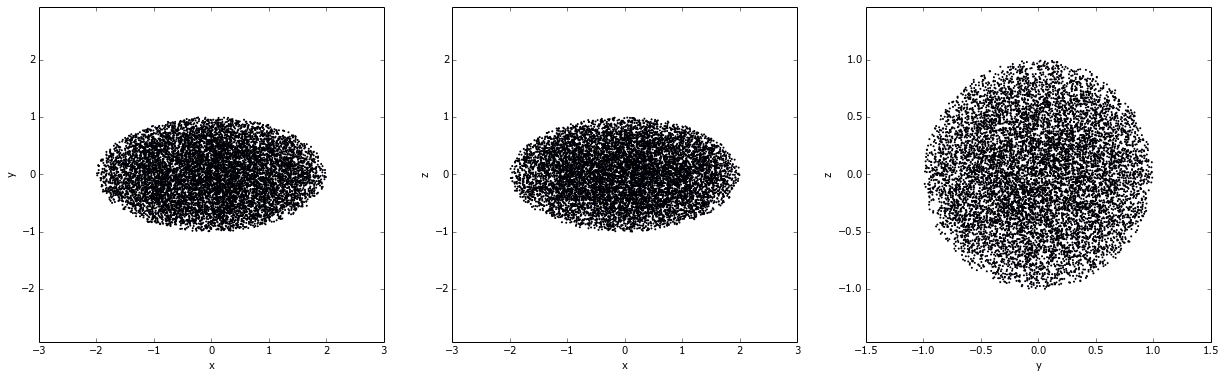

In [8]:
figure(figsize=(21, 6))
subplot(1, 3, 1)
scatter(x_sph, y_sph, s=1)
xlabel('x')
ylabel('y')
axis('equal')
subplot(1, 3, 2)
scatter(x_sph, z_sph, s=1)
xlabel('x')
ylabel('z')
axis('equal')
subplot(1, 3, 3)
scatter(y_sph, z_sph, s=1)
xlabel('y')
ylabel('z')
axis('equal')

(-1.5, 1.5)

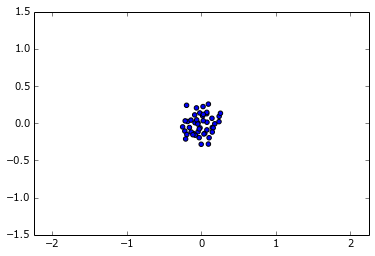

In [18]:
x_ell, y_ell, z_ell = shells(x_sph, y_sph, z_sph, 0.1, 2.0, 2, 1)
scatter(y_ell, z_ell)
axis('equal')
xlim(-3, 3)
ylim(-1.5, 1.5)

NameError: name 'x_shell' is not defined

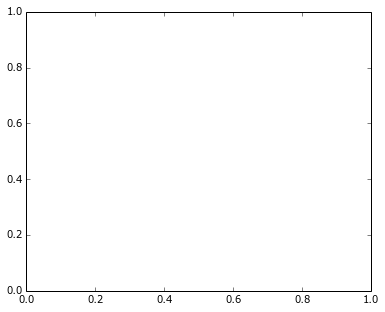

In [19]:
figure(figsize=(21, 5))
subplot(1, 3, 1)
scatter(x_shell, y_shell, s=1)
xlabel('x')
ylabel('y')
axis('equal')
subplot(1, 3, 2)
scatter(x_shell, z_shell, s=1)
xlabel('x')
ylabel('z')
axis('equal')
subplot(1, 3, 3)
scatter(y_shell, z_shell, s=1)
xlabel('y')
ylabel('z')
axis('equal')

In [20]:
S_test = shape_tensor(x_sph, y_sph, z_sph, 1, 1)
print S_test

TypeError: shape_tensor() takes exactly 3 arguments (5 given)

The eigenvalues represents the axis ratios of the new set of principal axis. 

In [49]:
eival, evec = eig(S_test)
print evec
print eival
print sqrt(eival[0]), sqrt(eival[1]), sqrt(eival[2])

[[-0.69831448 -0.57542556 -0.42572563]
 [-0.71574224  0.56828612  0.40591123]
 [-0.00836228 -0.58816351  0.80869881]]
[ 0.81441776  0.18956492  0.20066   ]
0.902450973878 0.435390535193 0.447950887271


In [55]:
tt = dot(evec, D)


(-1.5, 1.5, -1.5, 1.5)

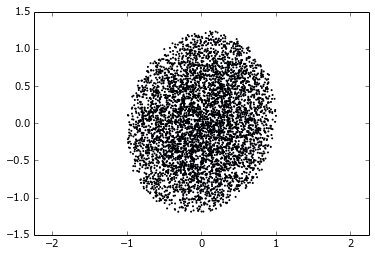

In [59]:
scatter(tt[1,:], tt[2,:], s=1)
axis('equal')

In [31]:
best_s, best_q = iteration(x_sph, y_sph, z_sph, 1E-3)

In [32]:
print best_s, best_qb

0.492070808228 0.496093444885
